In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;
%matplotlib inline

In [2]:
#read the dataset
data = pd.read_csv('BC_Final.csv', index_col=0)

In [3]:
data.head()

,BMI,BreastFeeding,Marital Status,Alcohol,Smoking,BreastCancerHistory,Age at firstPeriod,MenstrualCycle,Cancer Positive
Age,,,,,,,,,
48,8.543723,1,1,0,0,0,15,1,0
31,10.204207,1,1,0,0,0,12,1,0
31,13.807133,1,1,0,0,0,14,1,0
33,14.088867,1,1,1,0,0,12,1,0
49,14.494061,1,1,0,0,0,15,1,0


In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
#create an instace of the StandardScaler and fit the data 
#excluding the Cancer Positive Column (Result Column)
scale = StandardScaler()
scale.fit(data.drop('Cancer Positive', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [6]:
scaled_feat = scale.transform(data.drop('Cancer Positive', axis=1))

In [7]:
data_feature = pd.DataFrame(scaled_feat, columns=data.columns[:-1])

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, **options)>

In [10]:
x = data_feature
y = data['Cancer Positive']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knear = KNeighborsClassifier(n_neighbors=1)

In [13]:
knear.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [14]:
prediction = knear.predict(x_test)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
#print confusion matrix and the classification report
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[397  32]
 [ 46 242]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       429
           1       0.88      0.84      0.86       288

    accuracy                           0.89       717
   macro avg       0.89      0.88      0.89       717
weighted avg       0.89      0.89      0.89       717



In [17]:
#chose the correct K value using the elbow method
err_rate = []

for i in range(1,60): 
    knear = KNeighborsClassifier(n_neighbors=i)
    knear.fit(x_train, y_train)
    i_predict = knear.predict(x_test)
    err_rate.append(np.mean(i_predict != y_test))

Text(0, 0.5, 'Error rate')

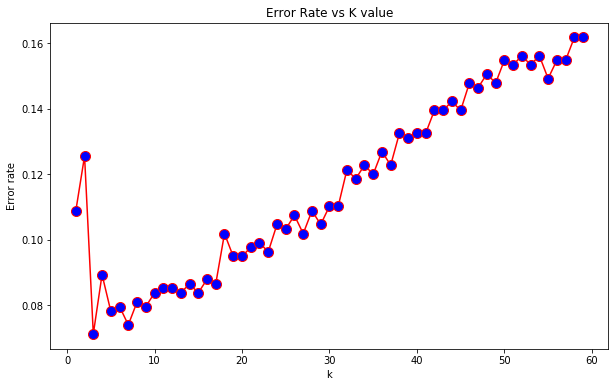

In [18]:
#plot the error rates for different k values
plt.figure(figsize=(10,6))
plt.plot(range(1,60), err_rate, color='red', marker='o', markerfacecolor='blue',markersize=10)
plt.title('Error Rate vs K value')
plt.xlabel('k')
plt.ylabel('Error rate')

In [19]:
err_rate

[0.1087866108786611,
 0.12552301255230125,
 0.07112970711297072,
 0.08926080892608089,
 0.07810320781032078,
 0.0794979079497908,
 0.07391910739191074,
 0.08089260808926081,
 0.0794979079497908,
 0.08368200836820083,
 0.08507670850767085,
 0.08507670850767085,
 0.08368200836820083,
 0.08647140864714087,
 0.08368200836820083,
 0.08786610878661087,
 0.08647140864714087,
 0.10181311018131102,
 0.09483960948396095,
 0.09483960948396095,
 0.09762900976290098,
 0.09902370990237098,
 0.09623430962343096,
 0.10460251046025104,
 0.10320781032078104,
 0.10739191073919108,
 0.10181311018131102,
 0.1087866108786611,
 0.10460251046025104,
 0.1101813110181311,
 0.1101813110181311,
 0.12133891213389121,
 0.11854951185495119,
 0.12273361227336123,
 0.1199442119944212,
 0.12691771269177127,
 0.12273361227336123,
 0.13249651324965134,
 0.13110181311018132,
 0.13249651324965134,
 0.13249651324965134,
 0.1394700139470014,
 0.1394700139470014,
 0.14225941422594143,
 0.1394700139470014,
 0.14783821478382148

In [20]:
knear1 = KNeighborsClassifier(n_neighbors=3)
knear1.fit(x_train, y_train)
perdiction1 = knear1.predict(x_test)

In [21]:
print(confusion_matrix(y_test, perdiction1))
print('\n')
print(classification_report(y_test, perdiction1))

[[407  22]
 [ 29 259]]


              precision    recall  f1-score   support

           0       0.93      0.95      0.94       429
           1       0.92      0.90      0.91       288

    accuracy                           0.93       717
   macro avg       0.93      0.92      0.93       717
weighted avg       0.93      0.93      0.93       717



In [22]:
import joblib as jb

In [23]:
jb.dump(knear1,'final_model.pkl')

['final_model.pkl']